In [82]:
# Importing required libraries 
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# reading the dataset
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

There are total of 12 columns with category types of data and 14 columns with numeric types of data.

In [3]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

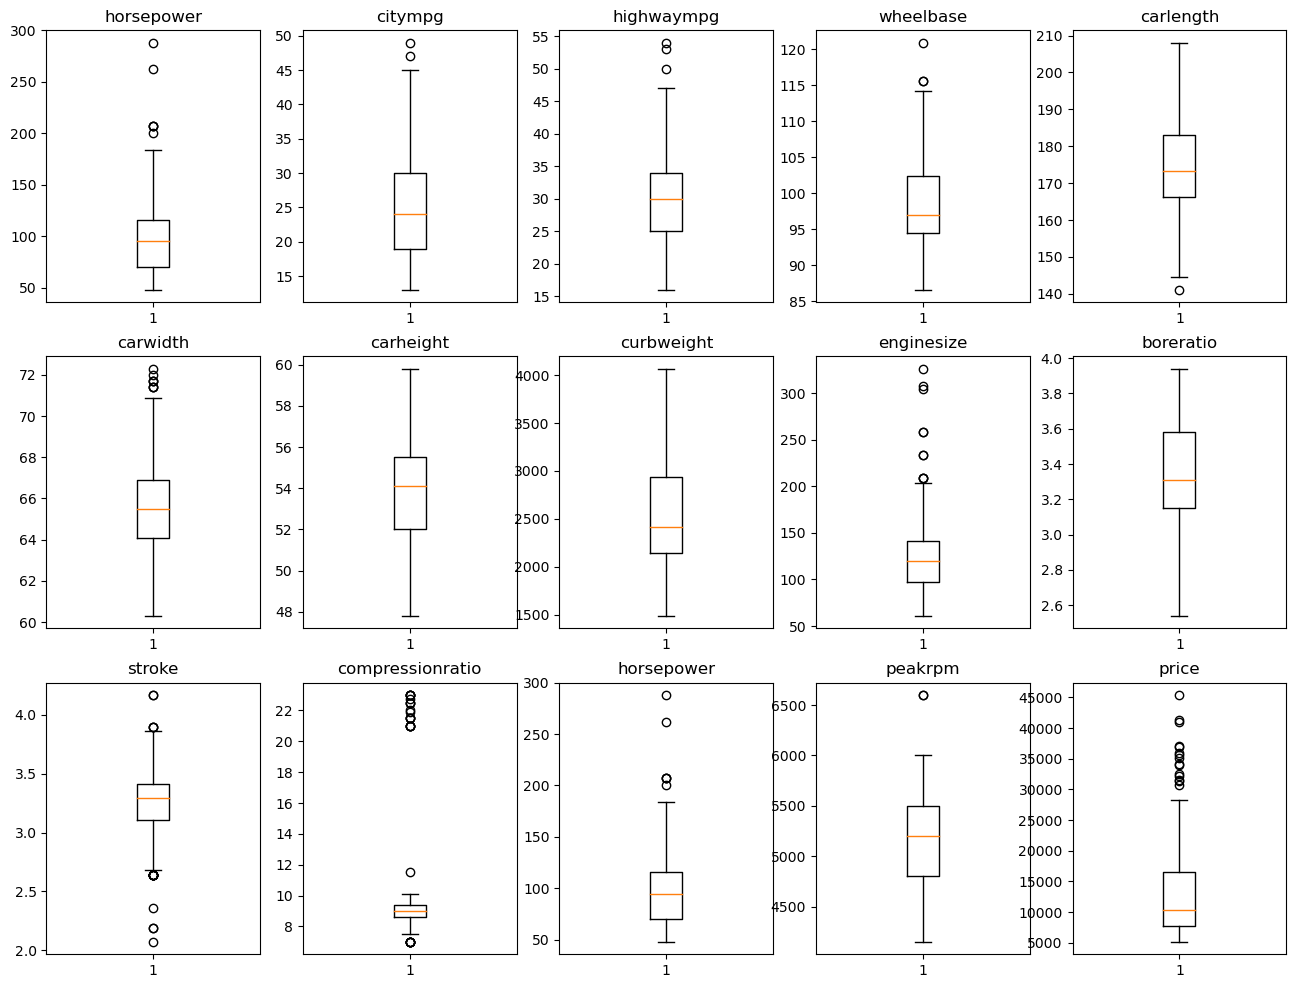

In [4]:
# select numeric columns to plot boxplot
selected_columns = ['horsepower','citympg','highwaympg','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','price']

# create a 1x2 grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(16, 12))

# loop over selected columns and draw a box plot for each column in a separate subplot
for i, column_name in enumerate(selected_columns):
    row = i // 5
    col = i % 5
    ax = axs[row, col] # get the current subplot
    ax.boxplot(df[column_name])
    ax.set_title(column_name)

plt.show()


Eventhough the boxplots show outliers. But these outlier values do exist for different varieties of cars. Therefore, these values will remain in the table for the next step in data method. 

In [5]:
# to check whether any value in columns is missing
df.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [6]:
#use this method to display all different values for a particular column
print(df.symboling.unique())

[ 3  1  2  0 -1 -2]


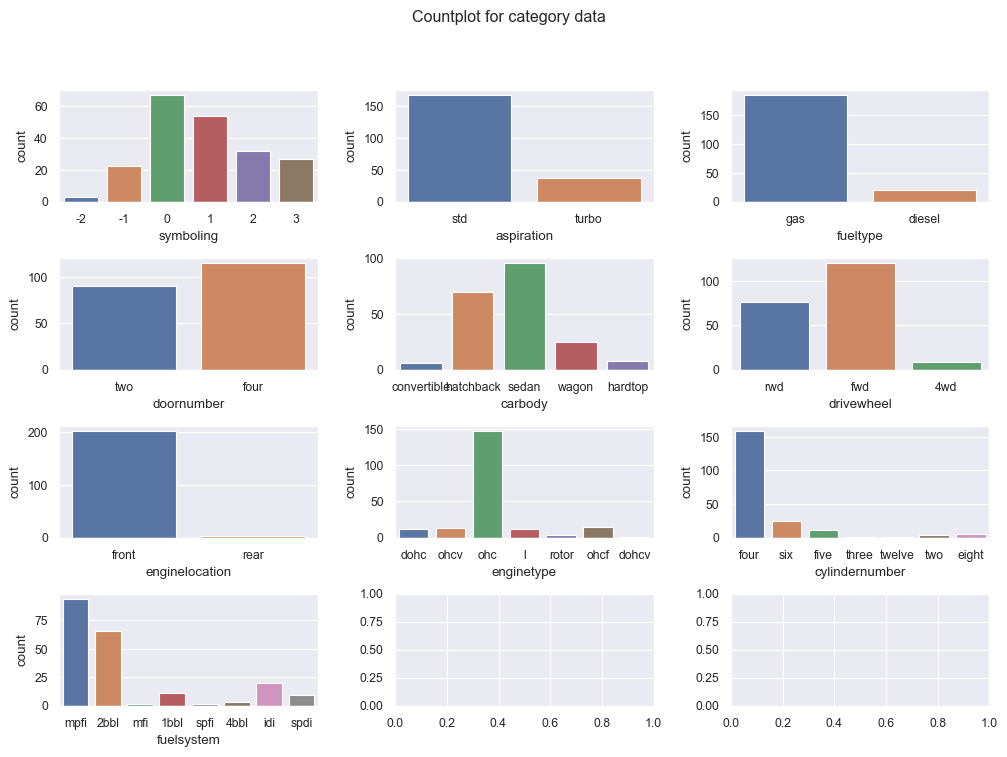

In [80]:
#use countplot to show category data
sns.set_context("paper")

# select numeric columns to plot boxplot
selected_columns = ['symboling','aspiration','fueltype','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']

# Create figure and axes objects using subplots
fig, ax = plt.subplots(4, 3, figsize=(12, 8))

# Flatten axes to iterate through them
axes = ax.flatten()

# Iterate through each column and corresponding axis
for col, axis in zip(selected_columns, axes):
    # Create countplot for current column and axis
    sns.countplot(x=col, data=df, ax=axis)

# Adjust plot layout
fig.suptitle("Countplot for category data")
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Show plot
plt.show()

In [96]:
# convert category type of data to what a linear regression model can use
# df is the original data set and df_1 is the transformed data set
# use Pandas' get_dummies function to one-hot encode the category column
one_hot = pd.get_dummies(df[['symboling','aspiration','fueltype','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']])
df_1=pd.concat([df, one_hot],axis=1)
df_1=df_1.drop(['car_ID','CarName','symboling','aspiration','fueltype','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'],axis=1)

In [99]:
col=df_1.columns
col

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'aspiration_std',
       'aspiration_turbo', 'fueltype_diesel', 'fueltype_gas',
       'doornumber_four', 'doornumber_two', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       

In [101]:
# Standardize predicting variables, add columns name to the standardized dataframe df_std
scaler=StandardScaler()
df_std=scaler.fit_transform(df_1)
df_std=pd.DataFrame(df_std)
df_std.columns=col
df_std.head()

wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0  -1.690772  -0.426521 -0.844782  -2.020417   -0.014566    0.074449   
1  -1.690772  -0.426521 -0.844782  -2.020417   -0.014566    0.074449   
2  -0.708596  -0.231513 -0.190566  -0.543527    0.514882    0.604046   
3   0.173698   0.207256  0.136542   0.235942   -0.420797   -0.431076   
4   0.107110   0.207256  0.230001   0.235942    0.516807    0.218885   

   boreratio    stroke  compressionratio  horsepower  ...  \
0   0.519071 -1.839377         -0.288349    0.174483  ...   
1   0.519071 -1.839377         -0.288349    0.174483  ...   
2  -2.404880  0.685946         -0.288349    1.264536  ...   
3  -0.517266  0.462183         -0.035973   -0.053668  ...   
4  -0.517266  0.462183         -0.540725    0.275883  ...   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_1bbl  \
0              -0.070014           -0.141069         -0.23812   
1              -0.070014           -0.141069         -0.23812   
2              -0.070014           -0.141069         -0.23812   
3              -0.070014           -0.141069         -0.23812   
4              -0.070014           -0.141069         -0.23812   

   fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  \
0        -0.689072        -0.121867       -0.328798       -0.070014   
1        -0.689072        -0.121867       -0.328798       -0.070014   
2        -0.689072        -0.121867       -0.328798       -0.070014   
3        -0.689072        -0.121867       -0.328798       -0.070014   
4        -0.689072        -0.121867       -0.328798       -0.070014   

   fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  
0          1.08667        -0.214286        -0.070014  
1          1.08667        -0.214286        -0.070014  
2          1.08667        -0.214286        -0.070014  
3          1.08667        -0.214286        -0.070014  
4          1.08667        -0.214286        -0.070014  

[5 rows x 52 columns]

EDA

In [43]:
#Call teh .corr() method on the df dataset

df.corr()

car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling        -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase         0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength         0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth          0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight         0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight        0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize       -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio         0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke           -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio  0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower       -0.015006   0.070873   0.353294   0.552623  0.640732   
peakrpm          -0.203789   0.273606  -0.360469  -0.287242 -0.220012   
citympg           0.015940  -0.035823  -0.470414  -0.670909 -0.642704   
highwaympg        0.011255   0.034606  -0.544082  -0.704662 -0.677218   
price            -0.109093  -0.079978   0.577816   0.682920  0.759325   

                  carheight  curbweight  enginesize  boreratio    stroke  \
car_ID             0.255960    0.071962   -0.033930   0.260064 -0.160824   
symboling         -0.541038   -0.227691   -0.105790  -0.130051 -0.008735   
wheelbase          0.589435    0.776386    0.569329   0.488750  0.160959   
carlength          0.491029    0.877728    0.683360   0.606454  0.129533   
carwidth           0.279210    0.867032    0.735433   0.559150  0.182942   
carheight          1.000000    0.295572    0.067149   0.171071 -0.055307   
curbweight         0.295572    1.000000    0.850594   0.648480  0.168790   
enginesize         0.067149    0.850594    1.000000   0.583774  0.203129   
boreratio          0.171071    0.648480    0.583774   1.000000 -0.055909   
stroke            -0.055307    0.168790    0.203129  -0.055909  1.000000   
compressionratio   0.261214    0.151362    0.028971   0.005197  0.186110   
horsepower        -0.108802    0.750739    0.809769   0.573677  0.080940   
peakrpm           -0.320411   -0.266243   -0.244660  -0.254976 -0.067964   
citympg           -0.048640   -0.757414   -0.653658  -0.584532 -0.042145   
highwaympg        -0.107358   -0.797465   -0.677470  -0.587012 -0.043931   
price              0.119336    0.835305    0.874145   0.553173  0.079443   

                  compressionratio  horsepower   peakrpm   citympg  \
car_ID                    0.150276   -0.015006 -0.203789  0.015940   
symboling                -0.178515    0.070873  0.273606 -0.035823   
wheelbase                 0.249786    0.353294 -0.360469 -0.470414   
carlength                 0.158414    0.552623 -0.287242 -0.670909   
carwidth                  0.181129    0.640732 -0.220012 -0.642704   
carheight                 0.261214   -0.108802 -0.320411 -0.048640   
curbweight                0.151362    0.750739 -0.266243 -0.757414   
enginesize                0.028971    0.809769 -0.244660 -0.653658   
boreratio                 0.005197    0.573677 -0.254976 -0.584532   
stroke                    0.186110    0.080940 -0.067964 -0.042145   
compressionratio          1.000000   -0.204326 -0.435741  0.324701   
horsepower               -0.204326    1.000000  0.131073 -0.801456   
peakrpm                  -0.435741    0.131073  1.000000 -0.113544   
citympg                   0.324701   -0.801456 -0.113544  1.000000   
highwaympg                0.265201   -0.770544 -0.054275  0.971337   
price                     0.067984    0.808139 -0.085267 -0.685751   

                  highwaympg     price  
car_ID              0.011255 -0.109093  
symboling           0.034606 -0.079978  
wheelbase          -0.544082  0.577816  
carlength          -0.704662  0.682920  
carwidth           -0.677218  0.759325  
carheight          -0.107358  0.119336  
curbwei

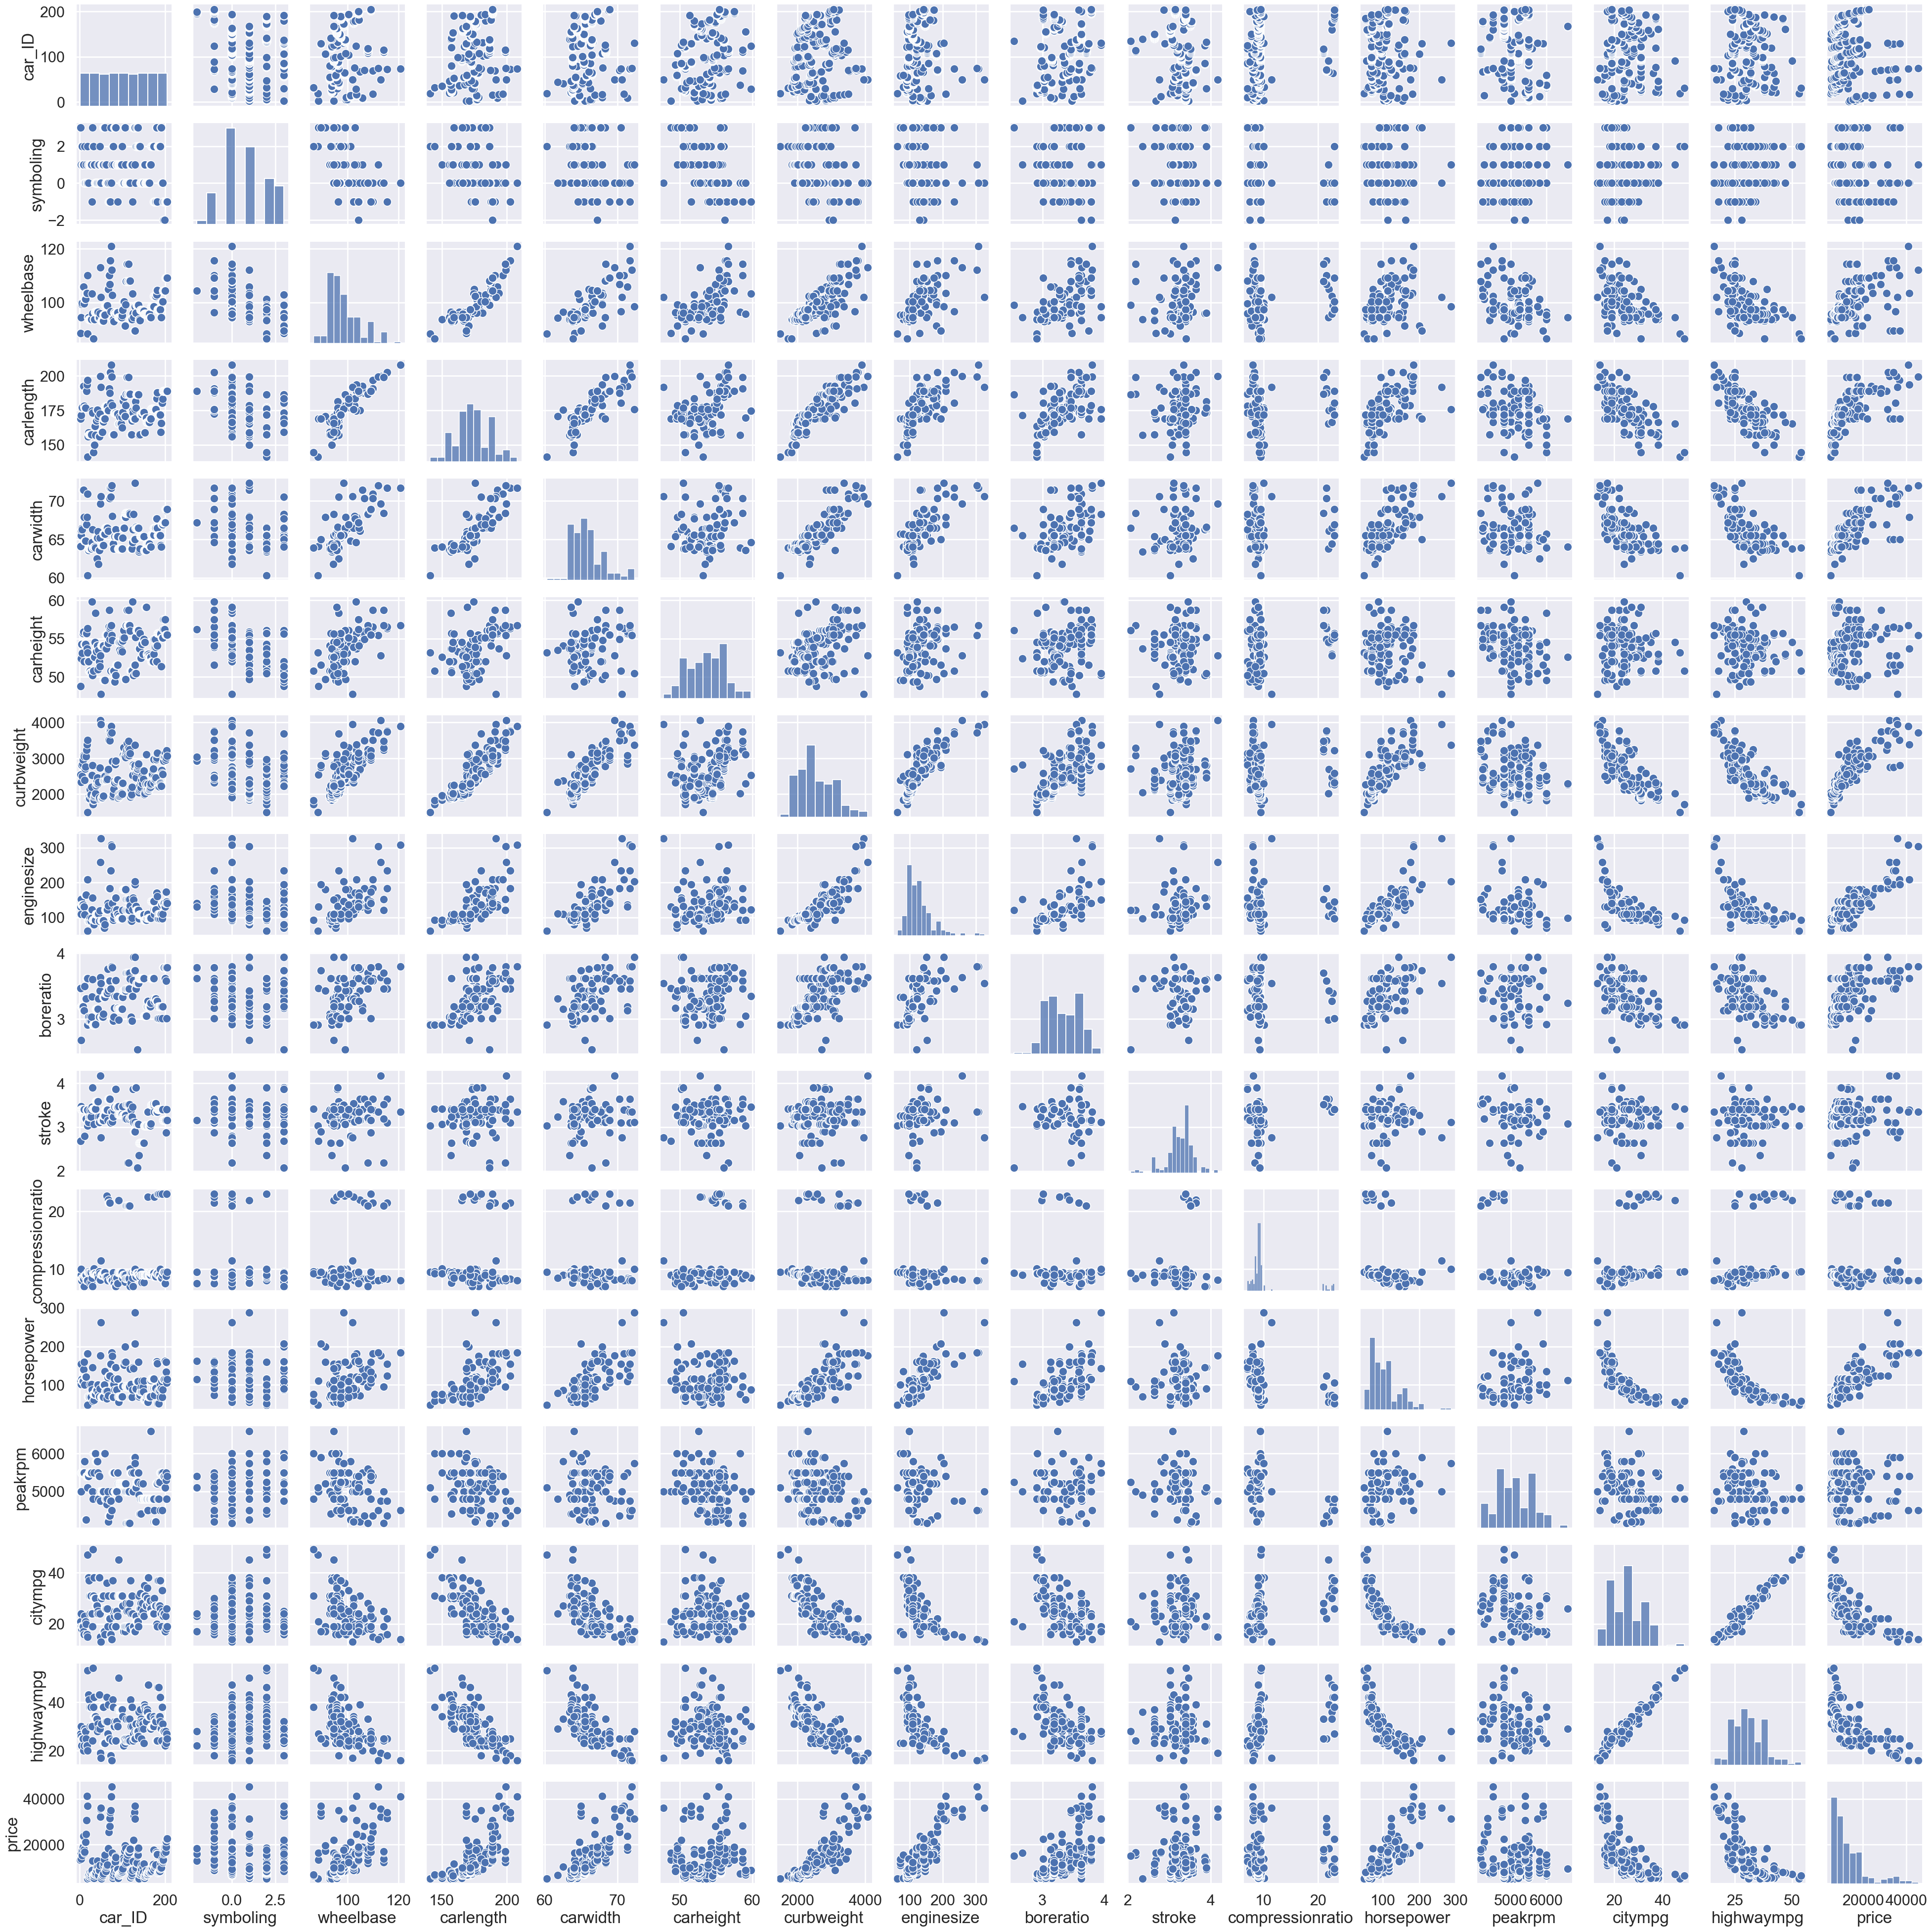

In [52]:
sns.set(rc={'figure.figsize':(12,8.279)})
sns.set_context("poster")
# Make a pairplot of the df data
sns.pairplot(df)

<AxesSubplot:>

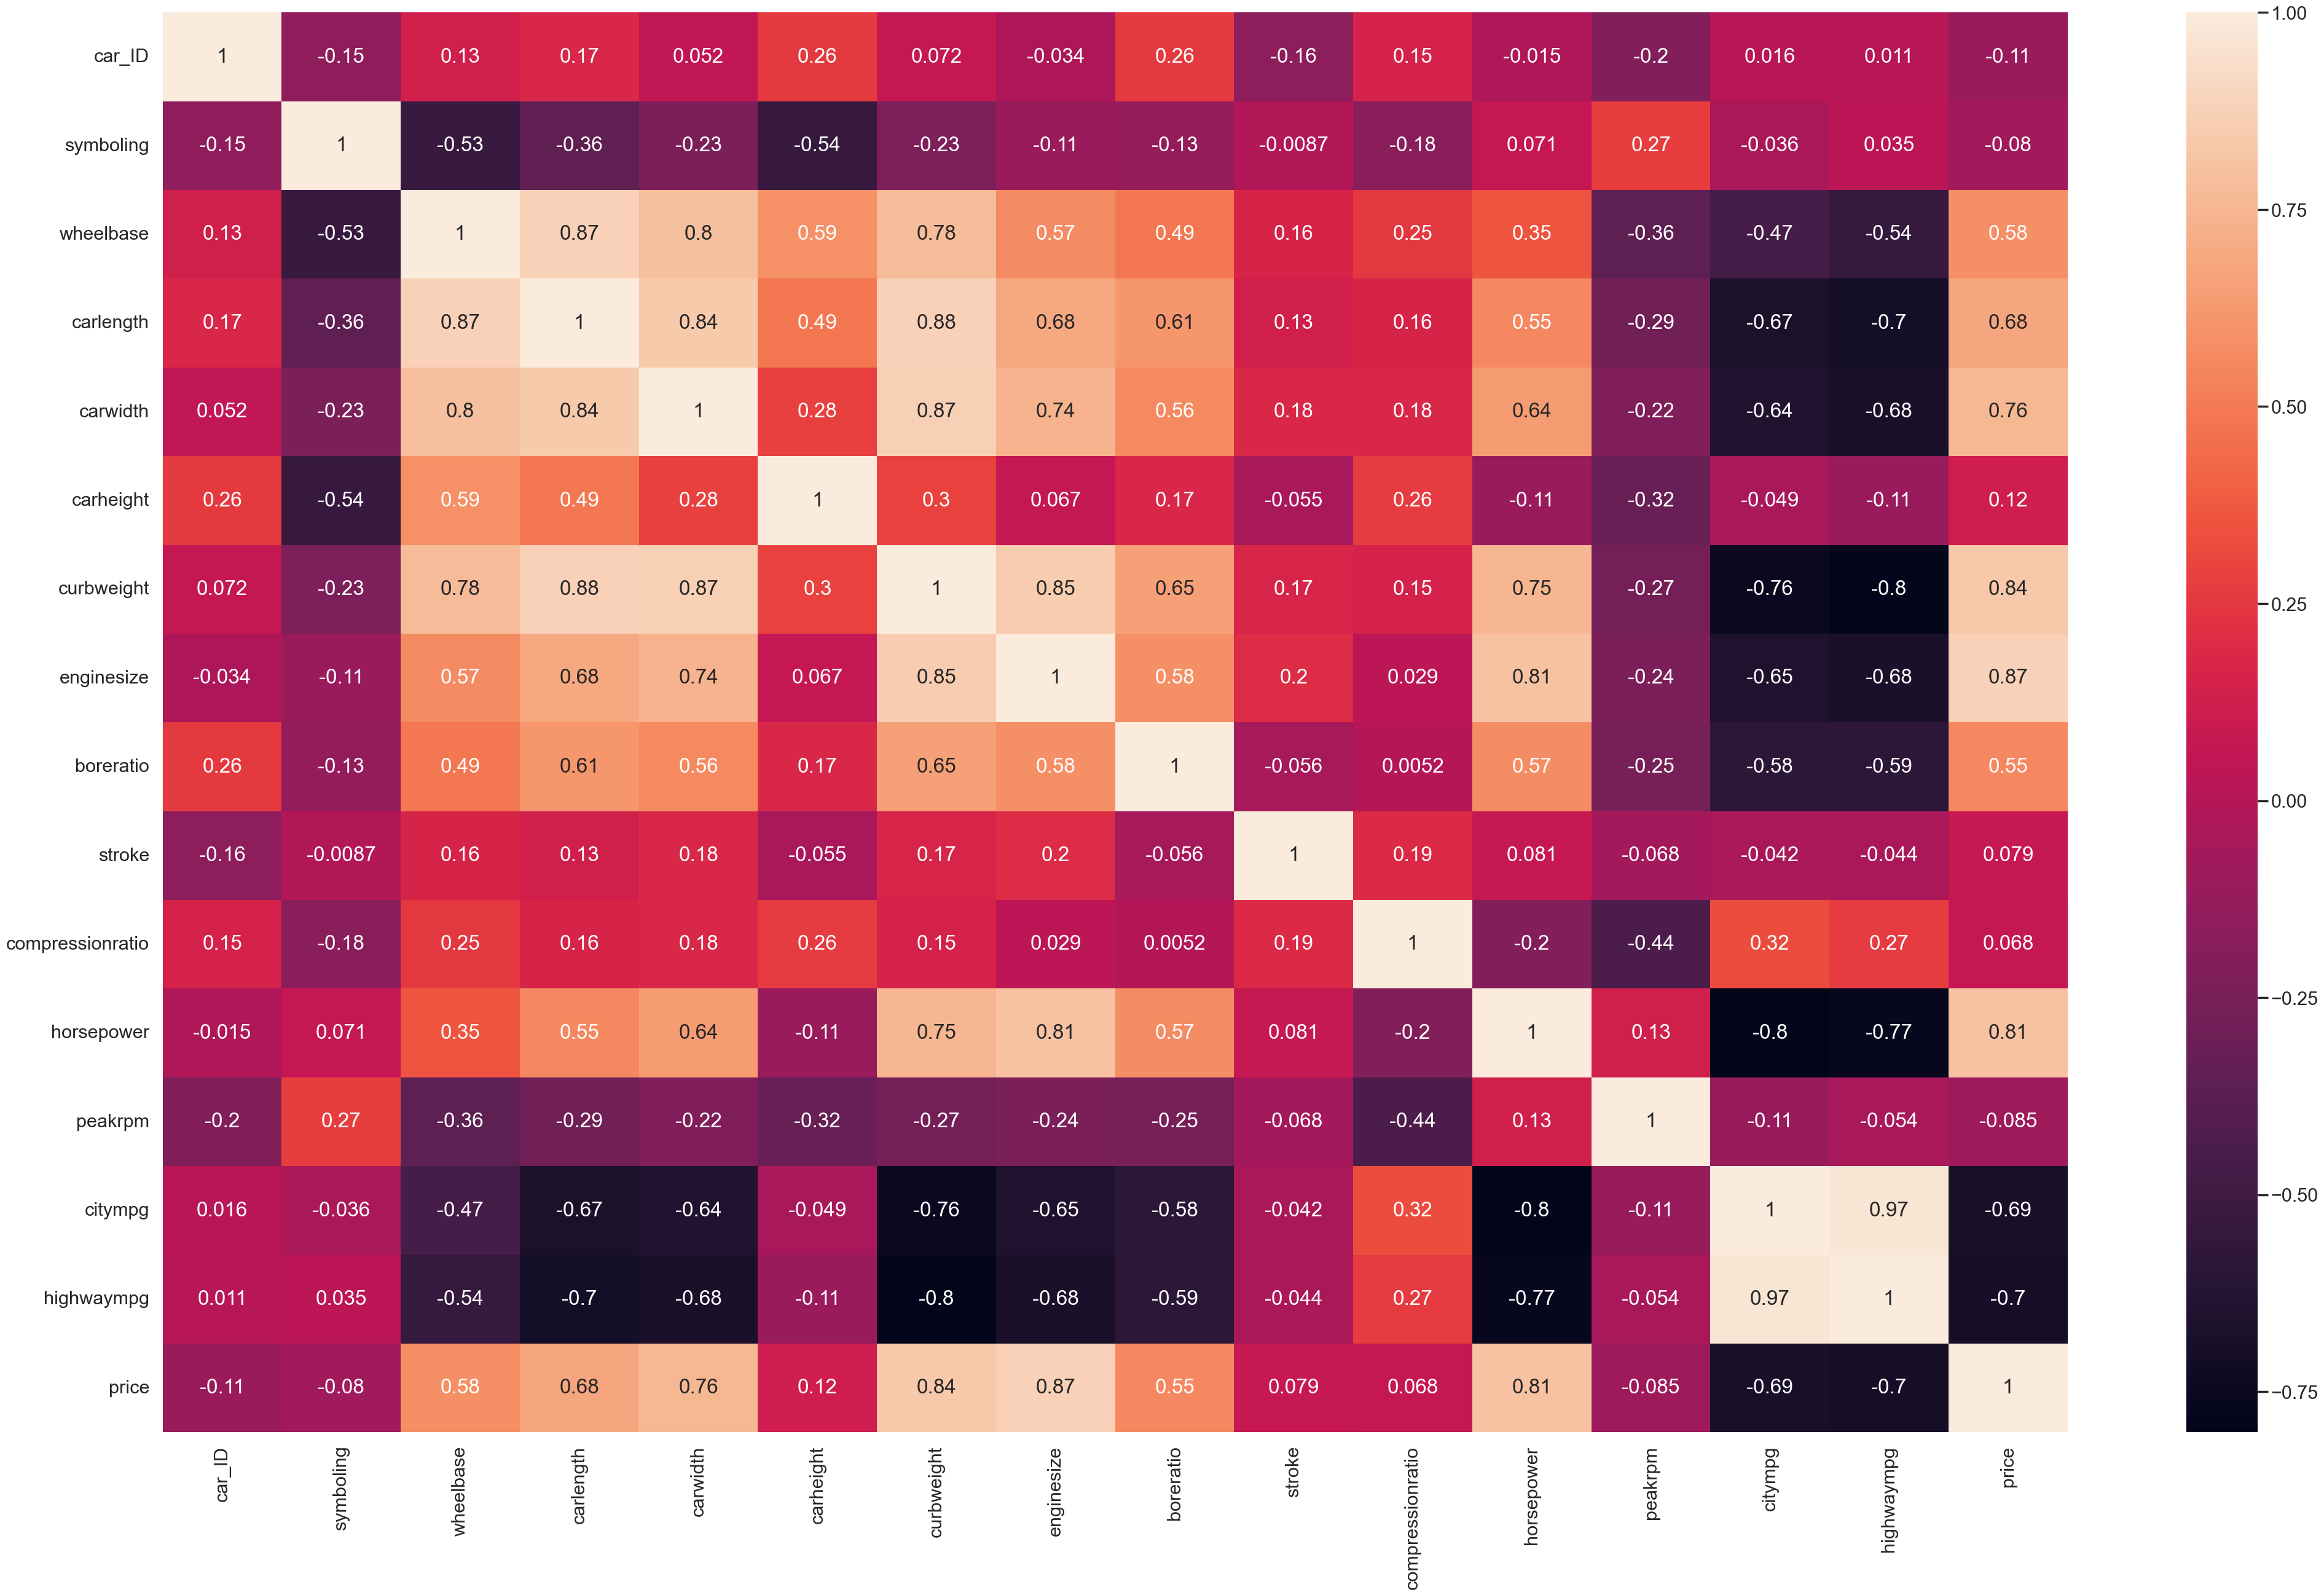

In [51]:
# Make a heatmap of the data
plt.figure(figsize=(50,30))
sns.set_context("poster")
sns.heatmap(df.corr(),annot=True)

Citympg and highwaympg have clear correlation with most of the other predicting variables. The response variable 'price' has clear correlation with wheelbase, carlength, carwidth, curbweight, enginesize, boreratio, horsepower, citympg, highwaympg. 